<a href="https://colab.research.google.com/github/sursuraj/sursuraj/blob/main/ML_DL_Fundamentals_lectures_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualizing 3D regression data

In [ ]:
import plotly.graph_objects as go

# Define the input and output values
inputs = [[1, 2], [2, 3], [3, 5]]
outputs = [3, 5, 7]

# Extract x, y, and z values
x = [i[0] for i in inputs]
y = [i[1] for i in inputs]
z = outputs

# Create a 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    marker=dict(size=8, color='blue', opacity=0.8),
    text=[f'({x[i]}, {y[i]}, {z[i]})' for i in range(len(x))],
    textposition="top center"
))

# Set layout for better visualization
fig.update_layout(
    title="Interactive 3D Visualization of Inputs and Outputs",
    scene=dict(
        xaxis_title="Input 1 (x)",
        yaxis_title="Input 2 (y)",
        zaxis_title="Output (z)"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Define the input and output values
inputs = np.array([[1, 2], [2, 3], [3, 5]])
outputs = np.array([3, 5, 7])

# Extract x, y, and z values
x = inputs[:, 0]
y = inputs[:, 1]
z = outputs

# Train linear regression model
regressor = LinearRegression()
regressor.fit(inputs, outputs)

# Generate a grid of points for the regression plane
x_range = np.linspace(min(x) - 1, max(x) + 1, 10)
y_range = np.linspace(min(y) - 1, max(y) + 1, 10)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
Z_grid = regressor.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)

# Create an interactive 3D plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    marker=dict(size=8, color='red', opacity=0.8),
    text=[f'({x[i]}, {y[i]}, {z[i]})' for i in range(len(x))],
    textposition="top center",
    name="Data Points"
))

# Add regression plane
fig.add_trace(go.Surface(
    x=X_grid, y=Y_grid, z=Z_grid,
    colorscale="blues",
    opacity=0.6,
    name="Regression Plane"
))

# Set layout for better visualization
fig.update_layout(
    title="Interactive 3D Regression Plane",
    scene=dict(
        xaxis_title="Input 1 (x)",
        yaxis_title="Input 2 (y)",
        zaxis_title="Output (z)"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()


### Section 1: Ordinary Least Squares (OLS) Formula

The solution for the optimal parameter \( \Theta^* \) in linear regression is given by:

$$ \Theta^* = \left( W^T W \right)^{-1} W^T T $$

### Explanation of Terms:
- \( W \): The design matrix (feature matrix), where each row corresponds to a training example and each column corresponds to a feature.
- \( T \): The target vector or matrix, containing the dependent variable values for each training example.





In [ ]:
import numpy as np

# Define W and T as given
W = np.array([[1, 1, 2],
              [1, 2, 3],
              [1, 3, 5]])
T = np.array([[3],
              [5],
              [7]])

# Compute the optimal Theta
W_T = W.T  # Transpose of W
Theta_optimal = np.linalg.inv(W_T @ W) @ W_T @ T

print("Optimal Theta (Θ*):")
print(Theta_optimal)


Optimal Theta (Θ*):
[[1.00000000e+00]
 [2.00000000e+00]
 [2.84217094e-14]]


### Section 2: Checking OLS fit to data (2D)


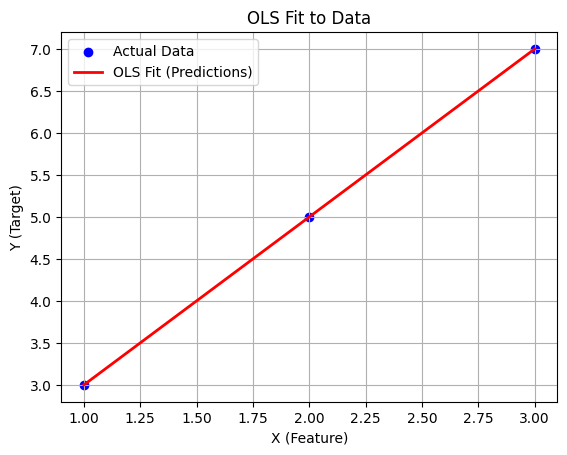

In [ ]:
import matplotlib.pyplot as plt

# Extracting features (X values) and actual targets (Y values)
X = W[:, 1]  # Use the second column as the x-axis variable
Y_actual = T.flatten()  # Actual target values

# Compute the predictions
Y_pred = W @ Theta_optimal  # Multiply W with Theta_optimal to get predictions
Y_pred = Y_pred.flatten()  # Flatten the predictions for plotting

# Plot the actual data and the OLS line
plt.scatter(X, Y_actual, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='OLS Fit (Predictions)', linewidth=2)

# Add labels, legend, and title
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.title('OLS Fit to Data')
plt.legend()
plt.grid()

# Show the plot
plt.show()

### Section 3: Checking OLS fit to data (3D)

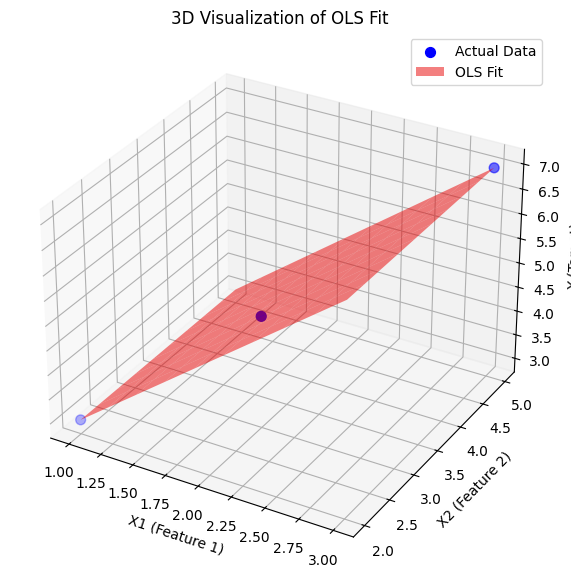

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Extracting features
X1 = W[:, 1]  # Second column (feature 1)
X2 = W[:, 2]  # Third column (feature 2)
Y_actual = T.flatten()  # Actual target values

# Compute the predictions
Y_pred = W @ Theta_optimal  # Multiply W with Theta_optimal to get predictions
Y_pred = Y_pred.flatten()  # Flatten the predictions for plotting

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X1, X2, Y_actual, color='blue', label='Actual Data', s=50)

# Plot the OLS plane
X1_range = np.linspace(min(X1), max(X1), 10)
X2_range = np.linspace(min(X2), max(X2), 10)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
Y_grid = Theta_optimal[0] + Theta_optimal[1] * X1_grid + Theta_optimal[2] * X2_grid
ax.plot_surface(X1_grid, X2_grid, Y_grid, color='red', alpha=0.5, label='OLS Fit')

# Add labels, legend, and title
ax.set_xlabel('X1 (Feature 1)')
ax.set_ylabel('X2 (Feature 2)')
ax.set_zlabel('Y (Target)')
ax.set_title('3D Visualization of OLS Fit')
plt.legend()
plt.show()

### Class assignment: Applying OLS to 1D data


In [ ]:
import numpy as np

# Define W and T as given
W = np.array([[1, 1],
              [1, 2],
              [1, 3],
              [1, 4]])
T = np.array([[2],
              [3],
              [5],
              [4]])

# Compute the optimal Theta
W_T = W.T  # Transpose of W
Theta_optimal = np.linalg.inv(W_T @ W) @ W_T @ T

print("Optimal Theta (Θ*):")
print(Theta_optimal)

Optimal Theta (Θ*):
[[1.5]
 [0.8]]


In [ ]:
## Plot predictions here

### Section 4: Non -invertible matrices cause issues in OLS


In [ ]:
import numpy as np

# Define W and T as given
W = np.array([[1, 1, 2],
              [1, 2, 3],
              [1, 3, 4]])
T = np.array([[3],
              [5],
              [7]])

# Compute the optimal Theta
W_T = W.T  # Transpose of W
Theta_optimal = np.linalg.inv(W_T @ W) @ W_T @ T

print("Optimal Theta (Θ*):")
print(Theta_optimal)

LinAlgError: Singular matrix

In [ ]:
print(W_T @ W)

[[ 3  6  9]
 [ 6 14 20]
 [ 9 20 29]]


*Class Question: What is happening here visually?*

### Section 5: Introduction to Ridge Regression

In [ ]:
import numpy as np

# Define W and T as given
W = np.array([[1, 1, 2],
              [1, 2, 3],
              [1, 3, 4]])
T = np.array([[3],
              [5],
              [7]])

# Define the regularization parameter (lambda)
lambda_reg = 0.1  # You can adjust this value as needed

# Identity matrix (same size as W^T W)
I = np.eye(W.shape[1])

# Compute the Ridge Regression solution
Theta_ridge = np.linalg.inv(W.T @ W + lambda_reg * I) @ W.T @ T

print("Optimal Theta (Θ* Ridge):")
print(Theta_ridge)


Optimal Theta (Θ* Ridge):
[[0.06634233]
 [0.94648386]
 [1.01282618]]


### Section 6: Effect of slopes on regression:


<ipython-input-8-b66af96ab54d>:20: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



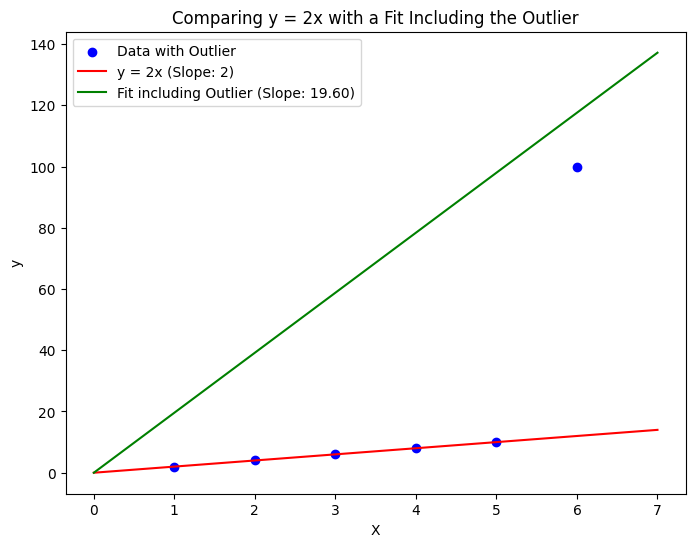

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset with an outlier
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([2, 4, 6, 8, 10, 100])  # The last point is a large outlier

# Generate y = 2x
X_test = np.linspace(0, 7, 100).reshape(-1, 1)
y_line = 2 * X_test

# Generate line trying to fit the outlier
fit_slope = (y[-1] - y[0]) / (X[-1] - X[0])
y_fit = fit_slope * X_test

# Plot the data and both lines
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data with Outlier')
plt.plot(X_test, y_line, color='red', label=f'y = 2x (Slope: 2)')
plt.plot(X_test, y_fit, color='green', label=f'Fit including Outlier (Slope: {float(fit_slope):.2f})')
plt.title("Comparing y = 2x with a Fit Including the Outlier")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Section 7: OLS vs Ridge Regression comparison.
### Part 1 - Effect of lambda


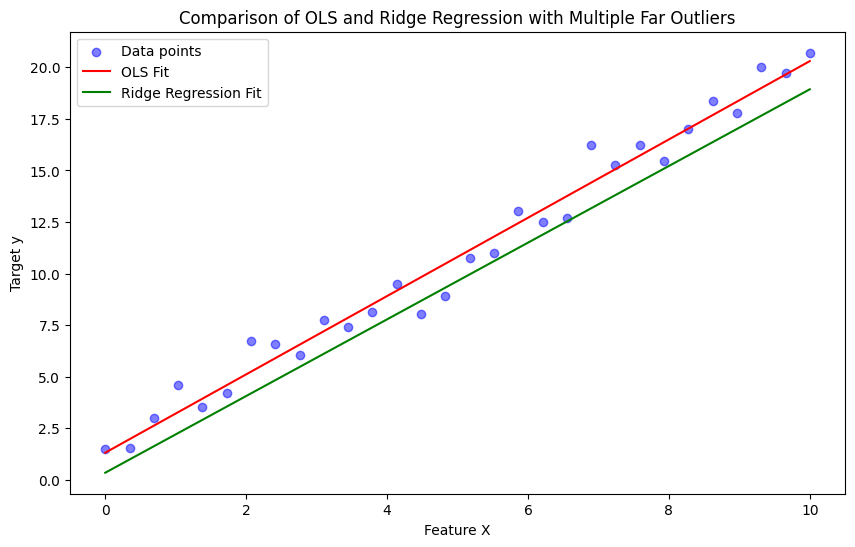

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a simple linear dataset
n_samples = 30
X_input = np.linspace(0, 10, n_samples)
y = 2 * X_input + 1 + np.random.randn(n_samples)  # True slope = 2, intercept = 1, some noise


#X_input = np.append(X_input, [15, 18, 20])  # Farther on the x-axis
#y = np.append(y, [80, 90, 100])  # Much higher y-values
#X = np.hstack([np.ones((n_samples + 3, 1)), X_input.reshape(-1, 1)])

X = np.hstack([np.ones((n_samples, 1)), X_input.reshape(-1, 1)])
# Compute the OLS and Ridge regression solutions
beta_OLS = np.linalg.inv(X.T @ X) @ X.T @ y
lambda_ridge = 100  # A stronger lambda to emphasize Ridge's dampening effect
I = np.eye(X.shape[1])
beta_Ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y

# Prepare to plot
plt.figure(figsize=(10, 6))
plt.scatter(X_input, y, color='blue', alpha=0.5, label='Data points')

# Plot the OLS fit
x_range = np.linspace(np.min(X_input), np.max(X_input), 100)
y_OLS = beta_OLS[0] + beta_OLS[1] * x_range
plt.plot(x_range, y_OLS, 'r-', label='OLS Fit')

# Plot the Ridge regression fit
y_Ridge = beta_Ridge[0] + beta_Ridge[1] * x_range
plt.plot(x_range, y_Ridge, 'g-', label='Ridge Regression Fit')

plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Comparison of OLS and Ridge Regression with Multiple Far Outliers')
plt.legend()
plt.show()


### Section 7: OLS vs Ridge Regression comparison.
### Part 2 - Checking outliers

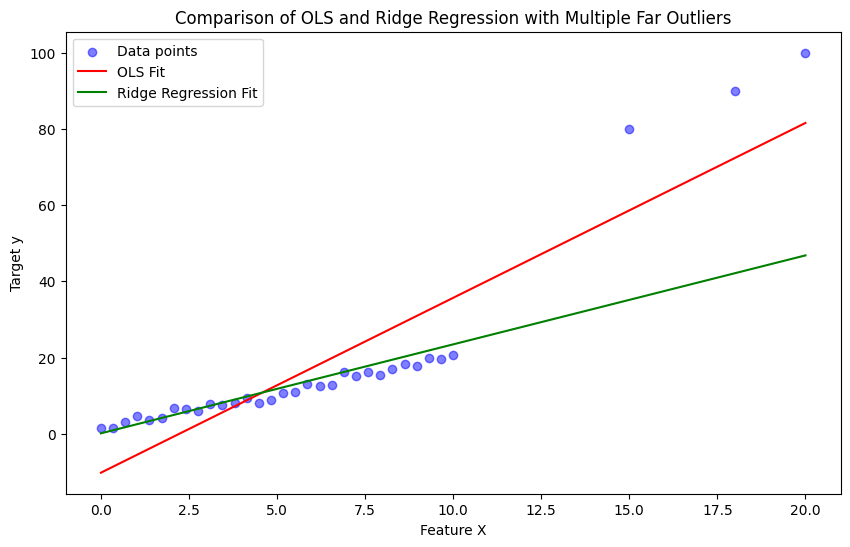

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a simple linear dataset
n_samples = 30
X_input = np.linspace(0, 10, n_samples)
y = 2 * X_input + 1 + np.random.randn(n_samples)  # True slope = 2, intercept = 1, some noise


X_input = np.append(X_input, [15, 18, 20])  # Farther on the x-axis
y = np.append(y, [80, 90, 100])  # Much higher y-values
X = np.hstack([np.ones((n_samples + 3, 1)), X_input.reshape(-1, 1)])

# Compute the OLS and Ridge regression solutions
beta_OLS = np.linalg.inv(X.T @ X) @ X.T @ y
lambda_ridge = 1000  # A stronger lambda to emphasize Ridge's dampening effect
I = np.eye(X.shape[1])
beta_Ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y

# Prepare to plot
plt.figure(figsize=(10, 6))
plt.scatter(X_input, y, color='blue', alpha=0.5, label='Data points')

# Plot the OLS fit
x_range = np.linspace(np.min(X_input), np.max(X_input), 100)
y_OLS = beta_OLS[0] + beta_OLS[1] * x_range
plt.plot(x_range, y_OLS, 'r-', label='OLS Fit')

# Plot the Ridge regression fit
y_Ridge = beta_Ridge[0] + beta_Ridge[1] * x_range
plt.plot(x_range, y_Ridge, 'g-', label='Ridge Regression Fit')

plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Comparison of OLS and Ridge Regression with Multiple Far Outliers')
plt.legend()
plt.show()

In [ ]:
beta_OLS[1]

4.58942769863536

In [ ]:
beta_Ridge[1]

2.3347277015540007

### Section 8: Visualizing ridge regression vs OLS loss landscape


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Seed for reproducibility
np.random.seed(42)

# Generate linearly correlated features
n_samples = 100
x1 = np.random.randn(n_samples)
x2 = 2 * x1  # Strong correlation with no additional noise

# Create a target y with some noise
y = 3 * x1 + 2 * x2 + np.random.randn(n_samples) * 0.5

# Define a range of values for beta_1 and beta_2 to calculate the loss
beta_1_range = np.linspace(-10, 10, 200)
beta_2_range = np.linspace(-20, 20, 200)
beta_1, beta_2 = np.meshgrid(beta_1_range, beta_2_range)

# Calculate OLS and Ridge loss for each combination of beta_1 and beta_2
def calculate_loss(beta_1, beta_2, x1, x2, y, lambda_ridge=0):
    loss = np.zeros(beta_1.shape)
    for i in range(beta_1.shape[0]):
        for j in range(beta_1.shape[1]):
            y_pred = beta_1[i, j] * x1 + beta_2[i, j] * x2
            loss[i, j] = np.sum((y - y_pred) ** 2) + lambda_ridge * (beta_1[i, j]**2 + beta_2[i, j]**2)
    return loss

loss_OLS = calculate_loss(beta_1, beta_2, x1, x2, y)
loss_Ridge = calculate_loss(beta_1, beta_2, x1, x2, y, lambda_ridge=500)

# Define the stagnation line where beta_2 = 2 * beta_1
stagnation_beta_1 = beta_1_range
stagnation_beta_2 = 2 * stagnation_beta_1

# OLS surface plot
fig_OLS = go.Figure(data=[go.Surface(z=loss_OLS, x=beta_1, y=beta_2, colorscale='Viridis', opacity=0.8)])
fig_OLS.update_layout(title='OLS Loss Surface', scene=dict(xaxis_title='beta_1', yaxis_title='beta_2', zaxis_title='Loss'))
fig_OLS.show()

# Ridge surface plot
fig_Ridge = go.Figure(data=[go.Surface(z=loss_Ridge, x=beta_1, y=beta_2, colorscale='Viridis', opacity=0.8)])
fig_Ridge.update_layout(title='Ridge Loss Surface', scene=dict(xaxis_title='beta_1', yaxis_title='beta_2', zaxis_title='Loss with Ridge Penalty'))
fig_Ridge.show()

## Section 9: Linear Regression for Weather Prediction with OLS

This notebook demonstrates how to perform a simple Linear Regression to predict precipitation (in mm) from three meteorological variables:
1. Temperature (°C)
2. Humidity (%)
3. Wind Speed (km/h)

We will:
- Generate synthetic but realistic weather data.
- Split our dataset into training and testing sets.
- Implement **Ordinary Least Squares (OLS)** manually using the closed-form equation
- Evaluate the model performance on the test set.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For a clean display
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
np.random.seed(42)  # For reproducibility


In [ ]:
# Number of samples
N = 1000

# Synthetic features
# Temperature (°C): random values between 0 and 40
temperature = 40 * np.random.rand(N)

# Humidity (%): random values between 20 and 100 (some lower limit of 20% to look a bit realistic)
humidity = 80 * np.random.rand(N) + 20

# Wind speed (km/h): random values between 0 and 30
wind_speed = 30 * np.random.rand(N)

# Let's define the "true" relationship for precipitation (in mm)
# Just as an example: precipitation = 0.7*Temperature + 0.4*Humidity + 0.6*WindSpeed + some noise
# We add random noise to make it more realistic
true_coeffs = [0.7, 0.4, 0.6]  # temperature, humidity, wind_speed
noise = 5 * np.random.randn(N)  # noise factor
precipitation = (true_coeffs[0] * temperature
                 + true_coeffs[1] * humidity
                 + true_coeffs[2] * wind_speed
                 + noise)

# Put them into a DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'WindSpeed': wind_speed,
    'Precipitation': precipitation
})

data.head(10)


Temperature   Humidity  WindSpeed  Precipitation
0     14.981605  34.810634   7.851171      34.421761
1     38.028572  63.352076   7.409364      59.491479
..          ...        ...        ...            ...
8     24.044600  39.973441   1.960985      25.116011
9     28.322903  59.153997  14.627136      54.307177

[10 rows x 4 columns]

Statistical Summary:


Temperature     Humidity    WindSpeed  Precipitation
count  1000.000000  1000.000000  1000.000000    1000.000000
mean     19.610262    60.561384    15.072172      47.006475
...            ...          ...          ...            ...
75%      29.772784    80.837205    22.773106      57.128510
max      39.988707    99.953098    29.934626      87.256744

[8 rows x 4 columns]


Correlation Matrix:


Temperature  Humidity  WindSpeed  Precipitation
Temperature       1.000000  0.029310   0.014518       0.575018
Humidity          0.029310  1.000000   0.027262       0.659531
WindSpeed         0.014518  0.027262   1.000000       0.395112
Precipitation     0.575018  0.659531   0.395112       1.000000

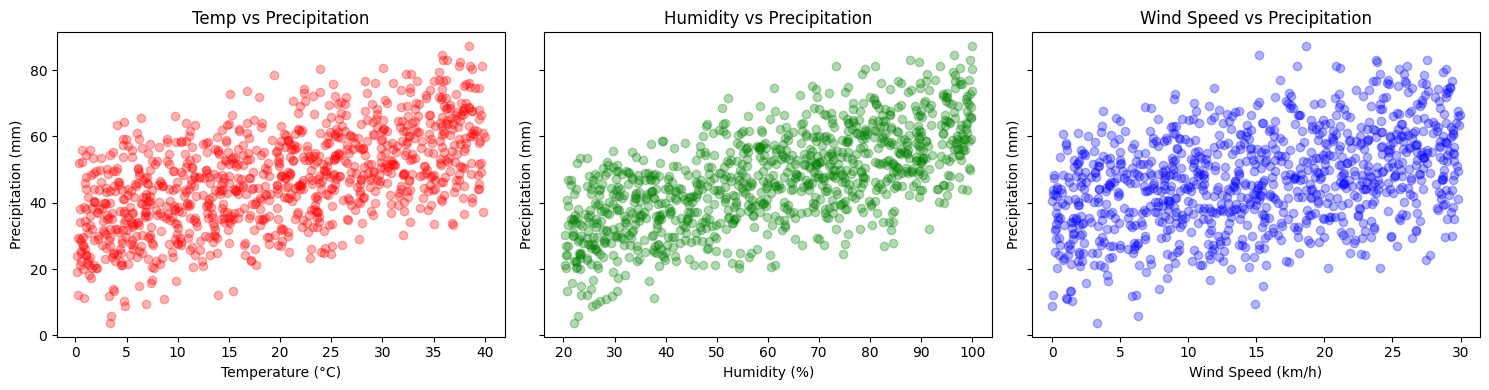

In [ ]:
# Let's get a quick statistical summary
print("Statistical Summary:")
display(data.describe())

# Optional: Correlation matrix
print("\nCorrelation Matrix:")
display(data.corr())

# Scatter plot to visualize relationship
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].scatter(data['Temperature'], data['Precipitation'], alpha=0.3, color='red')
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Precipitation (mm)")
axes[0].set_title("Temp vs Precipitation")

axes[1].scatter(data['Humidity'], data['Precipitation'], alpha=0.3, color='green')
axes[1].set_xlabel("Humidity (%)")
axes[1].set_ylabel("Precipitation (mm)")
axes[1].set_title("Humidity vs Precipitation")

axes[2].scatter(data['WindSpeed'], data['Precipitation'], alpha=0.3, color='blue')
axes[2].set_xlabel("Wind Speed (km/h)")
axes[2].set_ylabel("Precipitation (mm)")
axes[2].set_title("Wind Speed vs Precipitation")

plt.tight_layout()
plt.show()


In [ ]:
# Separate features (X) and target (y)
X = data[['Temperature', 'Humidity', 'WindSpeed']]
y = data['Precipitation']

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (800, 3)
Testing set size: (200, 3)


In [ ]:
# We need to add a column of 1s for the intercept in the design matrix
# X_tilde = [1, x1, x2, x3]
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))

X_train_tilde = np.hstack((ones_train, X_train.values))
X_test_tilde = np.hstack((ones_test, X_test.values))

# Apply OLS: w = (X^T X)^(-1) * X^T y
# Convert y to numpy array
y_train_array = y_train.values.reshape(-1, 1)

# Compute OLS coefficients
# Step 1: (X_train_tilde^T X_train_tilde)
A = X_train_tilde.T.dot(X_train_tilde)

# Step 2: (X_train_tilde^T y_train)
B = X_train_tilde.T.dot(y_train_array)

# Step 3: w = A_inv * B
w = np.linalg.inv(A).dot(B)

# w is a column vector: [intercept, coeff_temp, coeff_humidity, coeff_windSpeed]^T
intercept = w[0][0]
coeff_temp = w[1][0]
coeff_humidity = w[2][0]
coeff_wind = w[3][0]

print("OLS Coefficients:")
print(f"Intercept:        {intercept:.4f}")
print(f"Temp Coefficient: {coeff_temp:.4f}")
print(f"Humidity Coeff:   {coeff_humidity:.4f}")
print(f"WindSpeed Coeff:  {coeff_wind:.4f}")


OLS Coefficients:
Intercept:        1.2749
Temp Coefficient: 0.6872
Humidity Coeff:   0.3835
WindSpeed Coeff:  0.6033


In [ ]:
# Predictions on train set
y_pred_train = X_train_tilde.dot(w)

# Predictions on test set
y_pred_test = X_test_tilde.dot(w)

# Convert predictions from shape (N,1) to (N,)
y_pred_train = y_pred_train.flatten()
y_pred_test = y_pred_test.flatten()

# Calculate Mean Squared Error and Root Mean Squared Error
mse_train = np.mean((y_train - y_pred_train)**2)
mse_test = np.mean((y_test - y_pred_test)**2)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Train MSE:  {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test MSE:   {mse_test:.2f}")
print(f"Test RMSE:  {rmse_test:.2f}")


Train MSE:  24.56
Train RMSE: 4.96
Test MSE:   27.75
Test RMSE:  5.27


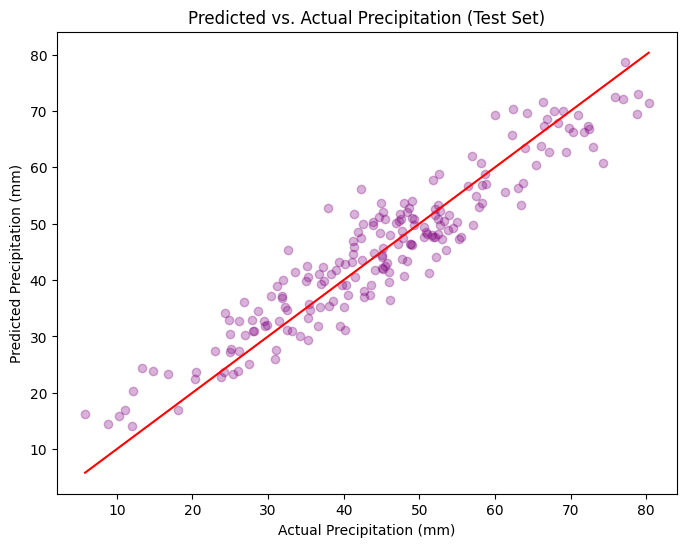

In [ ]:
# Let's plot predicted vs. actual for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, color='purple')
plt.xlabel("Actual Precipitation (mm)")
plt.ylabel("Predicted Precipitation (mm)")
plt.title("Predicted vs. Actual Precipitation (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
plt.show()


## Conclusion

In this notebook, we generated a synthetic weather dataset and applied the **Ordinary Least Squares** (closed-form) method for Linear Regression. We observed the estimated coefficients closely match our "true" synthetic relationship.

Key observations:
- Our model learned the parameters (`temperature`, `humidity`, and `wind speed`) reasonably well.
- With an RMSE in the single/double digits, we see that the model predictions are fairly close to the true values.
- This approach can be extended to real datasets from actual weather stations, and additional features such as atmospheric pressure, cloud cover, etc.

Feel free to experiment with:
1. Changing the random noise level.
2. Adjusting the size of the dataset.
3. Adding more features (e.g., pressure, cloud cover).
4. Using real weather datasets to see how it performs in the real world!


## Section 10: Linear Regression for Weather Prediction with Ridge Regression


In [ ]:
from sklearn.model_selection import KFold


In [ ]:
# Add a column of 1s for the intercept
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))

X_train_tilde = np.hstack((ones_train, X_train.values))
X_test_tilde = np.hstack((ones_test, X_test.values))

y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# We'll define a function that returns the ridge-closed-form solution
def ridge_closed_form(X_tilde, y, alpha):
    """
    Solves w for ridge regression: w = (X^T X + alpha*I)^{-1} X^T y
    X_tilde: (n_samples x (d+1)) design matrix with intercept
    y: (n_samples x 1) target vector
    alpha: regularization parameter
    """
    # Identity matrix of size (d+1 x d+1)
    # (Note: We do regularize the intercept in this simple example;
    # to exclude intercept from penalty, we'd adjust the matrix.)
    I = np.eye(X_tilde.shape[1])

    # Ridge solution
    A = X_tilde.T.dot(X_tilde) + alpha * I
    B = X_tilde.T.dot(y)
    w_ridge = np.linalg.inv(A).dot(B)
    return w_ridge


In [ ]:
def cross_val_ridge(X_tilde, y, alpha, k=5):
    """
    Performs k-fold cross validation for Ridge regression with closed-form solution.

    Parameters:
    -----------
    X_tilde : (n_samples x (d+1)) design matrix with intercept
    y       : (n_samples x 1) target vector
    alpha   : regularization parameter
    k       : number of folds (default=5)

    Returns:
    --------
    avg_mse : float
        The average MSE across the k validation folds
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    mse_scores = []

    for train_index, val_index in kf.split(X_tilde):
        # Split into train/val for this fold
        X_train_cv, X_val_cv = X_tilde[train_index], X_tilde[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Fit the model on the training fold
        w = ridge_closed_form(X_train_cv, y_train_cv, alpha)

        # Predict on the validation fold
        y_pred_val = X_val_cv.dot(w)

        # Compute MSE for the validation fold
        mse_val = np.mean((y_val_cv - y_pred_val)**2)
        mse_scores.append(mse_val)

    # Return average MSE across all folds
    avg_mse = np.mean(mse_scores)
    return avg_mse


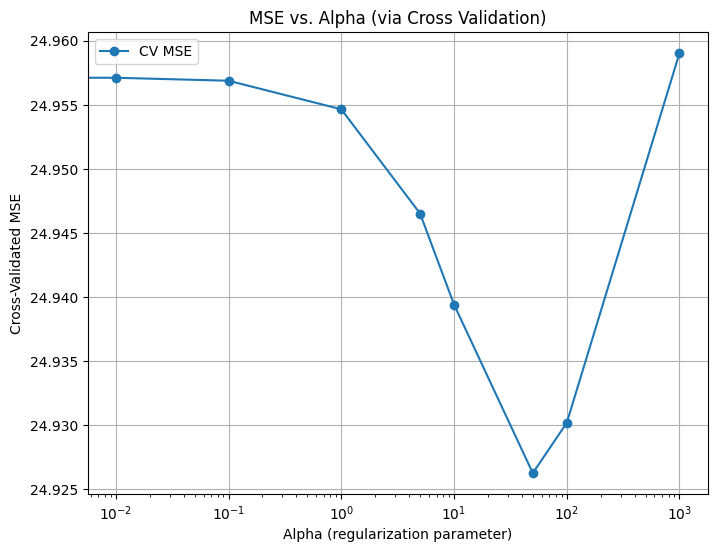

Alpha values: [0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 1000]
Cross-validated MSEs: [np.float64(24.957136188021096), np.float64(24.95711027165605), np.float64(24.956877999034297), np.float64(24.954648814023308), np.float64(24.94651519822464), np.float64(24.939415918259737), np.float64(24.926259572458655), np.float64(24.930181581048693), np.float64(24.95903230212446)]

Best alpha (by CV): 50.0


In [ ]:
# 4) Specify a range of alpha values to try
alphas = [0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 1000]

# 5) Compute cross-validated MSE for each alpha
cv_mses = []
for alpha in alphas:
    mse_cv = cross_val_ridge(X_train_tilde, y_train_array, alpha, k=5)
    cv_mses.append(mse_cv)

# 6) Plot the CV MSE as a function of alpha
plt.figure(figsize=(8, 6))
plt.plot(alphas, cv_mses, marker='o', label="CV MSE")
plt.xscale('log')  # Often we look at alpha on a log scale
plt.xlabel("Alpha (regularization parameter)")
plt.ylabel("Cross-Validated MSE")
plt.title("MSE vs. Alpha (via Cross Validation)")
plt.grid(True)
plt.legend()
plt.show()

best_alpha = alphas[np.argmin(cv_mses)]
print("Alpha values:", alphas)
print("Cross-validated MSEs:", cv_mses)
print("\nBest alpha (by CV):", best_alpha)

In [ ]:
# 8) Fit the final model using the entire training set and best_alpha
w_best = ridge_closed_form(X_train_tilde, y_train_array, best_alpha)

# Extract intercept and example coefficients
intercept        = w_best[0][0]
coeff_temp       = w_best[1][0]  # e.g. if first feature is 'Temp'
coeff_humidity   = w_best[2][0]  # second feature is 'Humidity'
coeff_windspeed  = w_best[3][0]  # third feature is 'WindSpeed'
print(f"\nRidge Regression Coefficients (best alpha = {best_alpha}):")
print(f"Intercept:        {intercept:.4f}")
print(f"Temp Coefficient: {coeff_temp:.4f}")
print(f"Humidity Coeff:   {coeff_humidity:.4f}")
print(f"WindSpeed Coeff:  {coeff_windspeed:.4f}")




Ridge Regression Coefficients (best alpha = 50.0):
Intercept:        0.7027
Temp Coefficient: 0.6930
Humidity Coeff:   0.3882
WindSpeed Coeff:  0.6115


In [ ]:
# 9) Evaluate on training set
y_pred_train_best = X_train_tilde.dot(w_best).flatten()
mse_train_best = np.mean((y_train - y_pred_train_best)**2)

# 10) Evaluate on the held-out test set
y_pred_test_best = X_test_tilde.dot(w_best).flatten()
mse_test_best = np.mean((y_test - y_pred_test_best)**2)

print(f"\nTrain MSE (best alpha): {mse_train_best:.4f}")
print(f"Test MSE  (best alpha): {mse_test_best:.4f}")


Train MSE (best alpha): 24.5824
Test MSE  (best alpha): 27.4271


In [ ]:
# 11) (Optional) Print out coefficients
intercept        = w_best[0][0]
coeff_temp       = w_best[1][0]  # example: first feature is 'Temp'
coeff_humidity   = w_best[2][0]  # second feature is 'Humidity'
coeff_windspeed  = w_best[3][0]  # third feature is 'WindSpeed'

print(f"\nRidge Regression Coefficients (best alpha = {best_alpha}):")
print(f"Intercept:        {intercept:.4f}")
print(f"Temp Coefficient: {coeff_temp:.4f}")
print(f"Humidity Coeff:   {coeff_humidity:.4f}")
print(f"WindSpeed Coeff:  {coeff_windspeed:.4f}")



Ridge Regression Coefficients (best alpha = 50.0):
Intercept:        0.7027
Temp Coefficient: 0.6930
Humidity Coeff:   0.3882
WindSpeed Coeff:  0.6115


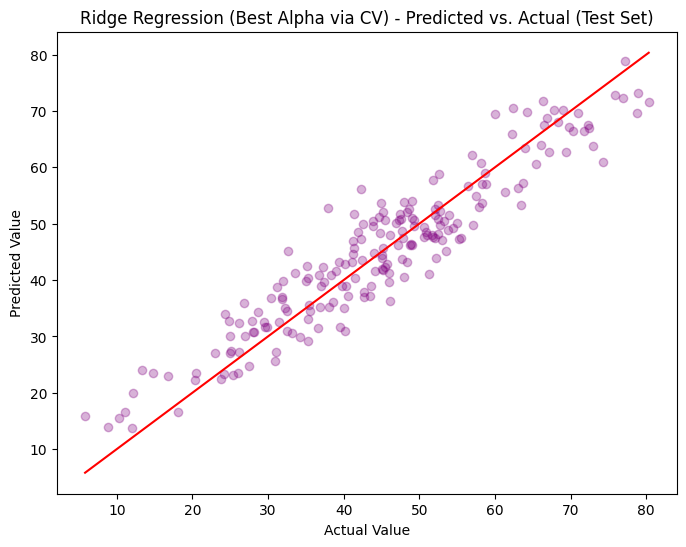

In [ ]:
# 12) (Optional) Plot predicted vs. actual on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_best, alpha=0.3, color='purple')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Ridge Regression (Best Alpha via CV) - Predicted vs. Actual (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
plt.show()

## Conclusion

In this notebook, we demonstrated **Ridge Regression** on a synthetic weather dataset:
- We generated synthetic data for `Temperature`, `Humidity`, and `WindSpeed` to predict `Precipitation`.
- We introduced a range of regularization parameters (\(\lambda\)) and observed their effect on **Train** and **Test MSE**.
- We identified the best \(\lambda\) based on **Test MSE** and used it to obtain the final model coefficients.
- Ridge Regression helps mitigate overfitting by penalizing large coefficient magnitudes.

You can continue to explore:
1. Adjusting the range of \(\lambda\).
2. Excluding the intercept from regularization (common in practice).
3. Comparing Ridge with other methods (Lasso, Elastic Net, etc.).

Feel free to adapt this code to real-world weather data for more meaningful insights!


## Section 11: Ridge vs No-Ridge for outliers


# Effect of Outliers on Ordinary Least Squares vs. Ridge Regression

In this notebook:
1. We generate synthetic weather data (Temperature, Humidity, Wind Speed) and a target variable (Precipitation).
2. We inject some outliers into the Precipitation target.
3. Compare how **Ordinary Least Squares** vs. **Ridge Regression** handle these outliers by comparing MSE on the test set.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)


In [ ]:
N = 1000

temperature = 40 * np.random.rand(N)       # 0 to 40°C
humidity = 80 * np.random.rand(N) + 20     # 20% to 100%
wind_speed = 30 * np.random.rand(N)        # 0 to 30 km/h

true_coeffs = [0.7, 0.4, 0.6]
noise = 5 * np.random.randn(N)
precipitation = (true_coeffs[0]*temperature
                 + true_coeffs[1]*humidity
                 + true_coeffs[2]*wind_speed
                 + noise)

df = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'WindSpeed': wind_speed,
    'Precipitation': precipitation
})

print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


Temperature   Humidity  WindSpeed  Precipitation
0    14.981605  34.810634   7.851171      34.421761
1    38.028572  63.352076   7.409364      59.491479
2    29.279758  89.835667  27.187637      76.160526
3    23.946339  78.577991   7.486386      45.855687
4     6.240746  84.524892   8.158492      49.133294

In [ ]:
# Let's create outliers in the 'Precipitation' column
# We'll randomly pick ~1% of the data to become outliers
num_outliers = int(0.5 * N)  # 1% outliers
outlier_indices = np.random.choice(df.index, size=num_outliers, replace=False)

# For each outlier, let's multiply precipitation by a big factor (e.g., 5) and add random big spikes
df.loc[outlier_indices, 'Precipitation'] = df.loc[outlier_indices, 'Precipitation'] * 5 + 50*np.random.randn(num_outliers)

print(f"Number of outliers introduced: {num_outliers}")
df.head(10)


Number of outliers introduced: 500


Temperature   Humidity  WindSpeed  Precipitation
0     14.981605  34.810634   7.851171      34.421761
1     38.028572  63.352076   7.409364     316.442921
..          ...        ...        ...            ...
8     24.044600  39.973441   1.960985      25.116011
9     28.322903  59.153997  14.627136      54.307177

[10 rows x 4 columns]

In [ ]:
X = df[['Temperature', 'Humidity', 'WindSpeed']]
y = df['Precipitation']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape: ", X_test.shape)


Training set shape: (800, 3)
Testing set shape:  (200, 3)


In [ ]:
# Add intercept
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))

X_train_tilde = np.hstack((ones_train, X_train.values))
X_test_tilde = np.hstack((ones_test, X_test.values))

y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# OLS closed-form: w = (X^T X)^{-1} X^T y
A = X_train_tilde.T.dot(X_train_tilde)
B = X_train_tilde.T.dot(y_train_array)
w_ols = np.linalg.inv(A).dot(B)

print("OLS Coefficients (with outliers):")
intercept_ols = w_ols[0][0]
coeff_temp_ols = w_ols[1][0]
coeff_humid_ols = w_ols[2][0]
coeff_wind_ols  = w_ols[3][0]
print(f"Intercept:        {intercept_ols:.4f}")
print(f"Temp Coefficient: {coeff_temp_ols:.4f}")
print(f"Humidity Coeff:   {coeff_humid_ols:.4f}")
print(f"WindSpeed Coeff:  {coeff_wind_ols:.4f}")

# Predictions and MSE
y_pred_train_ols = X_train_tilde.dot(w_ols).flatten()
y_pred_test_ols = X_test_tilde.dot(w_ols).flatten()

mse_train_ols = np.mean((y_train - y_pred_train_ols)**2)
mse_test_ols = np.mean((y_test - y_pred_test_ols)**2)

print(f"\nOLS Train MSE: {mse_train_ols:.2f}")
print(f"OLS Test MSE:  {mse_test_ols:.2f}")


OLS Coefficients (with outliers):
Intercept:        5.7091
Temp Coefficient: 1.6812
Humidity Coeff:   1.0827
WindSpeed Coeff:  2.4841

OLS Train MSE: 11049.62
OLS Test MSE:  10162.05


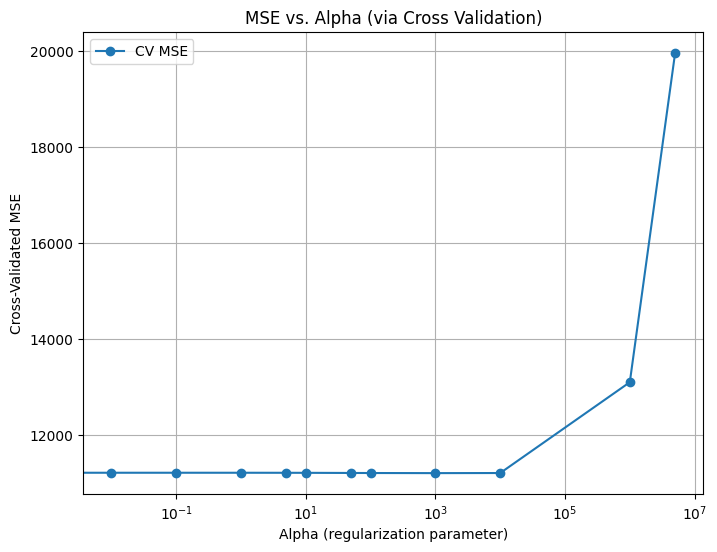

Alpha values: [0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 1000, 10000, 1000000, 5000000]
Cross-validated MSEs: [np.float64(11210.14285597848), np.float64(11210.140640774562), np.float64(11210.12075840766), np.float64(11209.927190691757), np.float64(11209.16920104781), np.float64(11208.408184562333), np.float64(11205.572112925518), np.float64(11204.433596382603), np.float64(11202.24237907086), np.float64(11204.28744955076), np.float64(13096.764189646527), np.float64(19955.57830837354)]

Best alpha (by CV): 1000

Ridge Regression Coefficients (best alpha = 1000):
Intercept:        0.3827
Temp Coefficient: 1.7318
Humidity Coeff:   1.1326
WindSpeed Coeff:  2.5365


In [ ]:
def ridge_closed_form(X_tilde, y, alpha):
    """
    Ridge solution: w = (X^T X + alpha*I)^{-1} X^T y
    We are including intercept in the regularization here
    (common practice is to exclude it, but this is simpler).
    """
    I = np.eye(X_tilde.shape[1])
    A_ridge = X_tilde.T.dot(X_tilde) + alpha * I
    B_ridge = X_tilde.T.dot(y)
    w_ridge = np.linalg.inv(A_ridge).dot(B_ridge)
    return w_ridge

# 4) Specify a range of alpha values to try
alphas = [0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 1000, 10000,  1000000, 5000000]

# 5) Compute cross-validated MSE for each alpha
cv_mses = []
for alpha in alphas:
    mse_cv = cross_val_ridge(X_train_tilde, y_train_array, alpha, k=5)
    cv_mses.append(mse_cv)

# 6) Plot the CV MSE as a function of alpha
plt.figure(figsize=(8, 6))
plt.plot(alphas, cv_mses, marker='o', label="CV MSE")
plt.xscale('log')  # Often we look at alpha on a log scale
plt.xlabel("Alpha (regularization parameter)")
plt.ylabel("Cross-Validated MSE")
plt.title("MSE vs. Alpha (via Cross Validation)")
plt.grid(True)
plt.legend()
plt.show()

best_alpha = alphas[np.argmin(cv_mses)]
print("Alpha values:", alphas)
print("Cross-validated MSEs:", cv_mses)
print("\nBest alpha (by CV):", best_alpha)

# 8) Fit the final model using the entire training set and best_alpha
w_best = ridge_closed_form(X_train_tilde, y_train_array, best_alpha)

# Extract intercept and example coefficients
intercept        = w_best[0][0]
coeff_temp       = w_best[1][0]  # e.g. if first feature is 'Temp'
coeff_humidity   = w_best[2][0]  # second feature is 'Humidity'
coeff_windspeed  = w_best[3][0]  # third feature is 'WindSpeed'
print(f"\nRidge Regression Coefficients (best alpha = {best_alpha}):")
print(f"Intercept:        {intercept:.4f}")
print(f"Temp Coefficient: {coeff_temp:.4f}")
print(f"Humidity Coeff:   {coeff_humidity:.4f}")
print(f"WindSpeed Coeff:  {coeff_windspeed:.4f}")


In [ ]:
# 9) Evaluate on training set
y_pred_train_best = X_train_tilde.dot(w_best).flatten()
mse_train_best = np.mean((y_train - y_pred_train_best)**2)

# 10) Evaluate on the held-out test set
y_pred_test_best = X_test_tilde.dot(w_best).flatten()
mse_test_best = np.mean((y_test - y_pred_test_best)**2)

print(f"\nTrain MSE (best alpha): {mse_train_best:.4f}")
print(f"Test MSE  (best alpha): {mse_test_best:.4f}")



Train MSE (best alpha): 11051.8209
Test MSE  (best alpha): 10127.4549


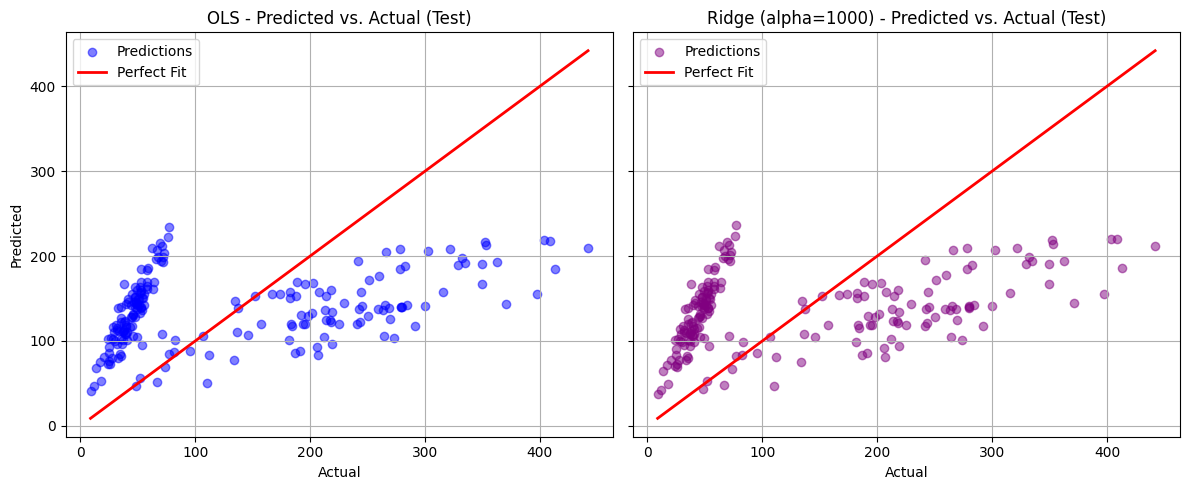

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (After you have fit your OLS model and best Ridge model) ...

# y_pred_test_ols contains predictions from the OLS model on the test set
# y_pred_test_best contains predictions from the best Ridge model on the test set
# y_test is the actual target values (test set)

# Example side-by-side scatter plots of Actual vs. Predicted
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

# --- Left subplot: OLS ---
axes[0].scatter(y_test, y_pred_test_ols, alpha=0.5, color='blue', label="Predictions")
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linewidth=2, label="Perfect Fit"
)
axes[0].set_title("OLS - Predicted vs. Actual (Test)")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].legend()
axes[0].grid(True)

# --- Right subplot: Ridge (best alpha) ---
axes[1].scatter(y_test, y_pred_test_best, alpha=0.5, color='purple', label="Predictions")
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linewidth=2, label="Perfect Fit"
)
axes[1].set_title(f"Ridge (alpha={best_alpha}) - Predicted vs. Actual (Test)")
axes[1].set_xlabel("Actual")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
